In [428]:
# Importamos las librerías que necesitamos

# Librerías de extracción de datos
# -----------------------------------------------------------------------

%load_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import sys
sys.path.append('..')
from src import funciones as f
from src import soporte_prep as sp

# Importaciones:
# Beautifulsoup
from bs4 import BeautifulSoup

# Requests
import requests

import pandas as pd
import numpy as np

from time import sleep

# Importar librerías para automatización de navegadores web con Selenium
# -----------------------------------------------------------------------
from selenium import webdriver  # Selenium es una herramienta para automatizar la interacción con navegadores web.
from webdriver_manager.chrome import ChromeDriverManager  # ChromeDriverManager gestiona la instalación del controlador de Chrome.
from selenium.webdriver.common.keys import Keys  # Keys es útil para simular eventos de teclado en Selenium.
from selenium.webdriver.support.ui import Select  # Select se utiliza para interactuar con elementos <select> en páginas web.
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException # Excepciones comunes de selenium que nos podemos encontrar 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
driver = webdriver.Chrome()
url_pvehicular = "https://dgii.gov.do/estadisticas/parquevehicular/Paginas/default.aspx"
driver.get(url_pvehicular)
driver.maximize_window()

sleep(1)  # Esperar un segundo entre cada scroll
#descargo el excel completo
try: 
    driver.find_element("xpath", '/html/body/form/div[4]/div/div/div/div[2]/span/div[1]/div/div/div[2]/div/div[2]/div/div[1]/div[1]/div/div[1]/div/div/div/div/ul/li[1]/a/div/div[2]').click()
except:
    print('No encuentro el botón para descargar')

for i in range(3):
    try:
        driver.execute_script("window.scrollBy(0, 500);")  # Desplazarse 1000 píxeles hacia abajo
    except:
        print('No he podido descender')
# descargo el excel de lo que va de año
driver.find_element('xpath', '/html/body/form/div[4]/div/div/div/div[2]/span/div[1]/div/div/div[2]/div/div[2]/div/div[2]/div/div/div[1]/div/div/div/div/ul/li[1]/a/div').click()

# Registro Histórico del Parque Vehicular

## Registro hasta diciembre del 2023, por provincias

In [261]:
df_2023 = pd.read_excel('C:\\Users\\DELL\\Downloads\\ParqueVehicular2023\\ParqueVehicular2023.xlsx', sheet_name='2.3.1', skiprows=11, index_col=0)

In [262]:
df_2023.reset_index(drop=True, inplace=True)

In [263]:
df_2023.head()

,Provincia,Tipo de Vehículo,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Total,Total %
0,NaN,Automóviles,Autobuses,Jeep,Carga,Motocicletas,Volteo,Máquinas Pesadas,Otros,NaN,NaN
1,Azua,7641,1352,4935,6559,52576,341,129,129,73662.0,1.267655
2,Bahoruco,2288,388,1326,1114,11407,97,22,25,16667.0,0.286824
3,Barahona,6637,1081,5175,3916,44324,262,78,208,61681.0,1.061473
4,Dajabón,2515,222,2421,2290,26624,114,129,57,34372.0,0.591510


In [264]:
# Renombrar las columnas manualmente
df_2023.columns = [
    "Provincia", 
    "Automóviles", 
    "Autobuses", 
    "Jeep", 
    "Carga", 
    "Motocicletas", 
    "Volteo", 
    "Máquinas Pesadas", 
    "Otros", 
    "Total", 
    "Total %"
]

df_2023 = df_2023.iloc[1:]

In [265]:
df_2023 = df_2023.iloc[:33]

In [266]:
df_2023.reset_index(drop=True, inplace=True)

In [267]:
df_2023.head()

,Provincia,Automóviles,Autobuses,Jeep,Carga,Motocicletas,Volteo,Máquinas Pesadas,Otros,Total,Total %
0,Azua,7641,1352,4935,6559,52576,341,129,129,73662.0,1.267655
1,Bahoruco,2288,388,1326,1114,11407,97,22,25,16667.0,0.286824
2,Barahona,6637,1081,5175,3916,44324,262,78,208,61681.0,1.061473
3,Dajabón,2515,222,2421,2290,26624,114,129,57,34372.0,0.591510
4,Distrito Nacional,446535,49784,227089,208389,772371,9328,12329,11920,1737745.0,29.904982


# EDA hasta el 2023

Para el cierre del 2023, el país contaba con un total de 5,810,888 vehículos en todo el territorio. De los cuáles el 56% corresponde a motocicletas, el 19.3% pertenece a automóviles y un 11.67% se atribuye a las famosas jeepetas o 'Jeep'. El resto se distribuye en vehículos de carga, autobuses, máquinas pesadas, volteo y otros.

En cuanto a la distribución del parque vehicular en las respectivas provincias, tenemos que relativamente el 30% (29.90%) de los vehículos se encuentran en la capital (Distrito Nacional). Seguido de Santo Domingo con un 16%, para luego mencionar a Santiago y La Vega. Estas últimas con un 7.93% y 5.38% respectivamente. Esto nos indica que el 45% de los vehículos se encuentra en la Región Ozama (Distrito Nacional y Santo Domingo), mientras que las siguientes provincias que más vehículos poseen se ubican en el Norte: Santiago, Región Cibao Norte y La Vega, Región Cibao Sur; aportando entre estas el porcentaje suficiente para elevar la presencia vehicular al 60% de su presencia en el país.

En cuanto a la distribución de los vehículos por las provincias, el Distrito Nacional se queda con la concentración de todas las categorías. Entre puntos importantes a mencionar están:
    - Automóviles por encima de 440,000 (446,535)
    - Autobuses rozando los 50,000 (49784)
    - Jeep por la mitad de automóviles (227,089)
    - Motocicletas es el dato más alarmante ya que solo esta categoría se encuentra cerca del millón (772,371)

Podemos ver en las demás provincias importantes que hemos señalado, en Santo Domingo también hay grandes números:
    - Automoviles 258,110
    - Jeep hay 135623
    - Motocicletas 413,411

En estos dos casos se puede observar que los números son elevados, pero queda claro de que las motocicletas pueden superar a los vehículos casi un ratio de 2:1. Esto se puede ver explicado de una manera muy sencilla: son zonas relativamente pequeñas en cuanto a tamaño, pero concentran una gran cantidad de vehículos produciéndose así muchos embotellamientos vehiculares. Sin embargo, no queda solo ahí: muchas personas recurren a este medio de transporte como sistén económico (lo usan para movilizar personas, cosas o hacer mandados) por lo que este vehículo en sí es una inversión directa para su bien económico y soporte familiar. Así mismo, incurrir en los gatos para una motocicleta supone una inversión sumamente menor a lo que suele costar un coche por lo que la gran mayoría de personas que no tienen los recursos (clase media-baja, baja) utilizan la motocicleta como medio de transporte. Además de que la República Dominicana no es un país que cuente con accesibilidad para un tranporte público de calidad, ya que no hay muchas opciones y estas no cubren la gran mayoría de zonas.

Al alejarnos un poco más de 

In [268]:
df_2023.describe()

,Total,Total %
count,3.300000e+01,33.000000
mean,3.521750e+05,6.060606
std,1.033640e+06,17.787980
min,5.581000e+03,0.096044
25%,3.437200e+04,0.591510
50%,9.127100e+04,1.570689
75%,1.697370e+05,2.921017
max,5.810888e+06,100.000000


In [269]:
df_total_2023 = df_2023.iloc[[-1]].T

In [270]:
df_total_2023.rename(columns={32:'Cantidad'}, inplace=True)

In [271]:
df_total_2023 = df_total_2023.iloc[1:10]

In [272]:
df_total_2023['Cantidad'] = df_total_2023['Cantidad'].astype(float)

In [273]:
df_total_2023['Total_%'] = (df_total_2023['Cantidad'] / 5810888.0) * 100

In [274]:
df_total_2023.sort_values(by='Cantidad', ascending=False)

,Cantidad,Total_%
Total,5810888.0,100.000000
Motocicletas,3281018.0,56.463281
Automóviles,1122336.0,19.314363
Jeep,678470.0,11.675840
Carga,521278.0,8.970712
Autobuses,130691.0,2.249071
Máquinas Pesadas,27582.0,0.474661
Volteo,25545.0,0.439606
Otros,23968.0,0.412467


In [275]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         33 non-null     object 
 1   Automóviles       33 non-null     object 
 2   Autobuses         33 non-null     object 
 3   Jeep              33 non-null     object 
 4   Carga             33 non-null     object 
 5   Motocicletas      33 non-null     object 
 6   Volteo            33 non-null     object 
 7   Máquinas Pesadas  33 non-null     object 
 8   Otros             33 non-null     object 
 9   Total             33 non-null     float64
 10  Total %           33 non-null     float64
dtypes: float64(2), object(9)
memory usage: 3.0+ KB


In [276]:
columnas_int = df_2023.iloc[:,1:9].columns.tolist()

df_2023[columnas_int] = df_2023[columnas_int].astype(int)

In [277]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         33 non-null     object 
 1   Automóviles       33 non-null     int32  
 2   Autobuses         33 non-null     int32  
 3   Jeep              33 non-null     int32  
 4   Carga             33 non-null     int32  
 5   Motocicletas      33 non-null     int32  
 6   Volteo            33 non-null     int32  
 7   Máquinas Pesadas  33 non-null     int32  
 8   Otros             33 non-null     int32  
 9   Total             33 non-null     float64
 10  Total %           33 non-null     float64
dtypes: float64(2), int32(8), object(1)
memory usage: 1.9+ KB


In [278]:
df_2023.describe()

,Automóviles,Autobuses,Jeep,Carga,Motocicletas,Volteo,Máquinas Pesadas,Otros,Total,Total %
count,3.300000e+01,33.000000,33.000000,33.000000,3.300000e+01,33.000000,33.000000,33.000000,3.300000e+01,33.000000
mean,6.802036e+04,7920.666667,41119.393939,31592.606061,1.988496e+05,1548.181818,1671.636364,1452.606061,3.521750e+05,6.060606
std,2.085470e+05,24169.489846,123098.391072,95771.665282,5.721192e+05,4625.043956,5132.509047,4579.805549,1.033640e+06,17.787980
min,6.030000e+02,86.000000,486.000000,505.000000,3.740000e+03,41.000000,12.000000,5.000000,5.581000e+03,0.096044
25%,2.515000e+03,405.000000,2820.000000,2452.000000,2.662400e+04,126.000000,94.000000,55.000000,3.437200e+04,0.591510
50%,9.764000e+03,1081.000000,6484.000000,5828.000000,6.632600e+04,341.000000,289.000000,183.000000,9.127100e+04,1.570689
75%,2.142600e+04,2723.000000,16131.000000,12704.000000,1.206440e+05,546.000000,562.000000,434.000000,1.697370e+05,2.921017
max,1.122336e+06,130691.000000,678470.000000,521278.000000,3.281018e+06,25545.000000,27582.000000,23968.000000,5.810888e+06,100.000000


In [279]:
df_2023[['Provincia', 'Total', 'Total %']].sort_values(by='Total', ascending=False)[1:11]

,Provincia,Total,Total %
4,Distrito Nacional,1737745.0,29.904982
30,Santo Domingo,933901.0,16.071571
28,Santiago,461275.0,7.938115
14,La Vega,313193.0,5.389761
23,San Cristóbal,256841.0,4.419996
12,La Altagracia,186133.0,3.203177
5,Duarte,174479.0,3.002622
13,La Romana,169737.0,2.921017
21,Puerto Plata,154919.0,2.666012
26,San Pedro de Macorís,141045.0,2.427254


In [280]:
df_2023 = df_2023.iloc[:32] # de esta forma quito la última fila de total

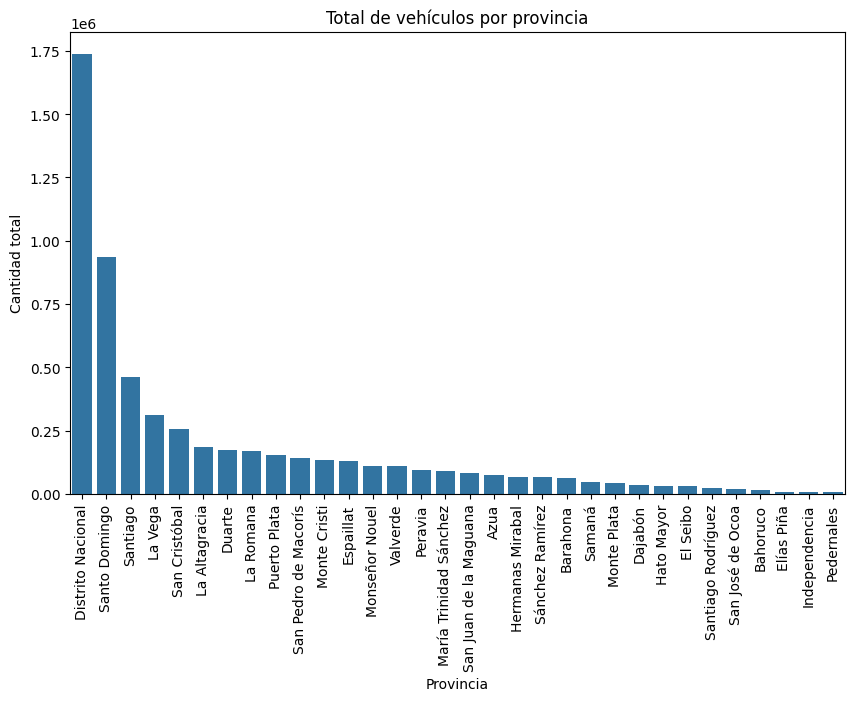

In [281]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Provincia', y= 'Total', data=df_2023, order=df_2023.sort_values(by='Total', ascending=False)['Provincia'])
plt.title('Total de vehículos por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad total')
plt.xticks(rotation=90)
plt.show()


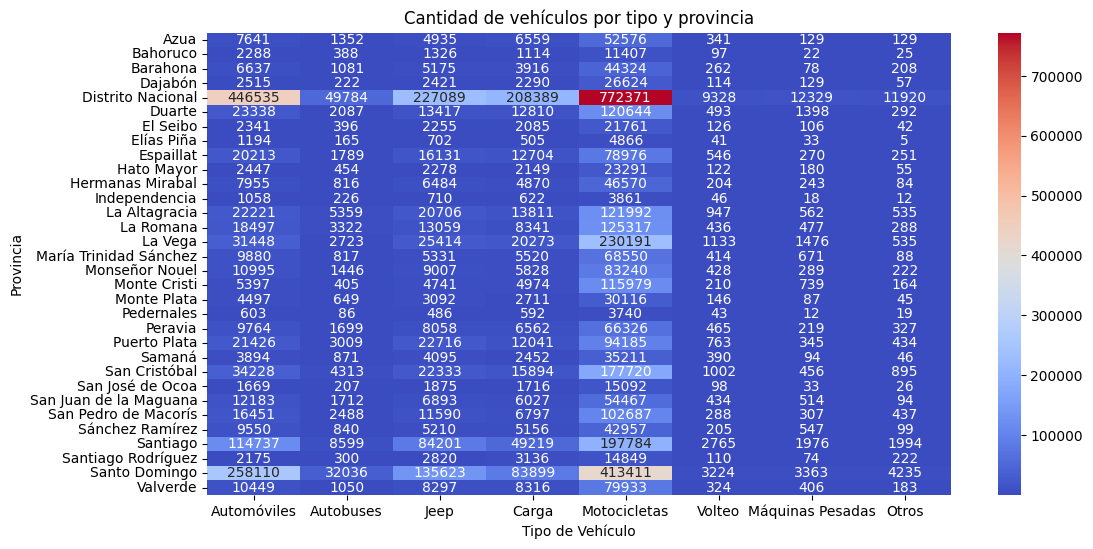

In [282]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_2023[columnas_int], annot=True, fmt='d', cmap='coolwarm', xticklabels=columnas_int, yticklabels=df_2023['Provincia'])
plt.title('Cantidad de vehículos por tipo y provincia')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Provincia')
plt.show()

In [283]:
df_2023[['Provincia', 'Automóviles']].sort_values(by='Automóviles', ascending=False)[1:11]

,Provincia,Automóviles
30,Santo Domingo,258110
28,Santiago,114737
23,San Cristóbal,34228
14,La Vega,31448
5,Duarte,23338
12,La Altagracia,22221
21,Puerto Plata,21426
8,Espaillat,20213
13,La Romana,18497
26,San Pedro de Macorís,16451


c:\Users\DELL\Git\Proyecto_Final\Notebooks\..\src\funciones.py:539: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  
c:\Users\DELL\Git\Proyecto_Final\Notebooks\..\src\funciones.py:539: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  
c:\Users\DELL\Git\Proyecto_Final\Notebooks\..\src\funciones.py:539: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  
c:\Users\DELL\Git\Proyecto_Final\Notebooks\..\src\funciones.py:539: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the s

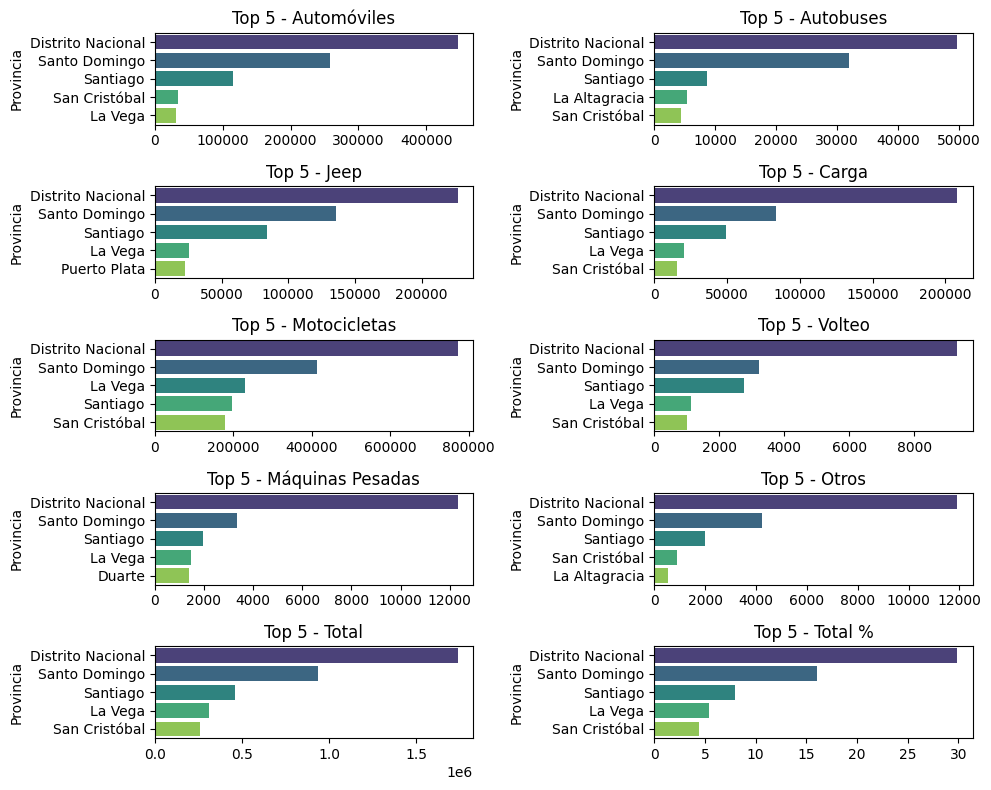

In [321]:
f.plot_top_numericas(dataframe=df_2023, columna_categoria='Provincia', top_n=5)

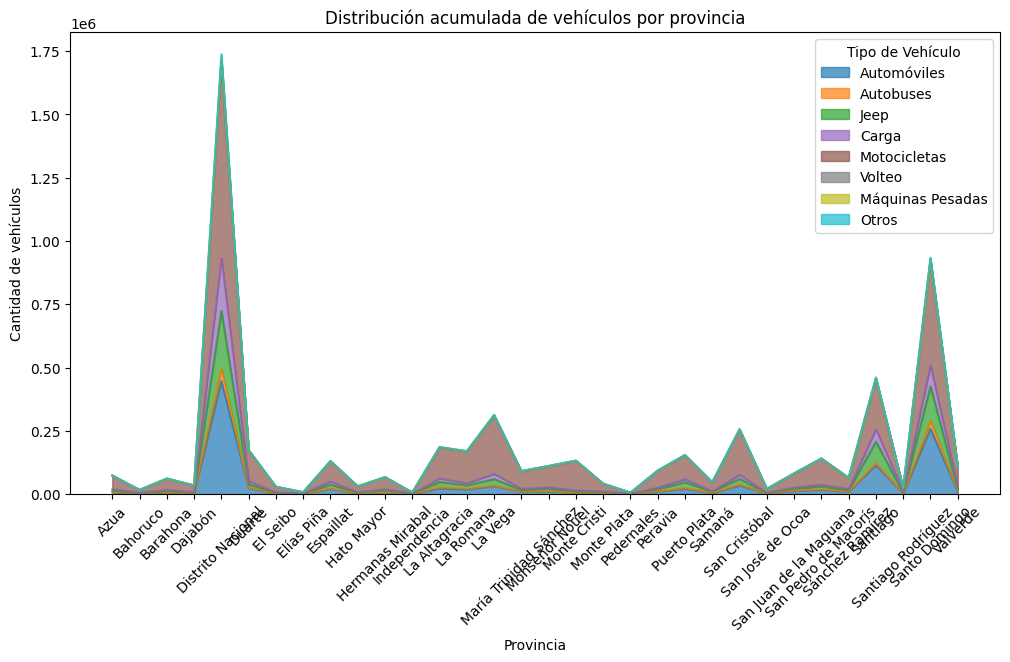

In [287]:
df_2023[columnas_int].plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab10', alpha=0.7)
plt.title('Distribución acumulada de vehículos por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de vehículos')
plt.xticks(ticks=range(len(df_2023['Provincia'])), labels=df_2023['Provincia'], rotation=45)
plt.legend(title='Tipo de Vehículo')
plt.show()


## Registro 2024

## Histórico

En cuanto al avance histórico de los medios de transporte, desde el 2005 hasta el 2023, vamos a destacar 3 categorías: Automóviles, Jeep y Motocicletas. 

- En el caso de las motocicletas, estas tenían un número de 843941 en el 2005 para superar los 3 millones en el 2023 (3,281,018) produciéndose un aumento de 2437077. Cabe destacar que este es el grupo con mayor presencia en cuanto a los medios de transporte en la República Dominicana.
- En el caso de los automóviles, se ha mantenido en el segundo lugar en cuanto al registro histórico. Este ha conseguido un aumento gradual pero no tan marcado como las motocicletas. En el 2005 habían poco más de medio millón de coches en el país (560,880), mientras que para el 2023 era de más de un millón (1122336)
- En el caso de los jeep, comenzó el siglo ocupando el tercer lugar por debajo de los vehículos de carga. Había poco más de 100 mil unidades (124802), mientras que para el 2023 ya se ha multiplicado por 5 esta cantidad (678470)

In [288]:
df_historico = pd.read_excel('C:\\Users\\DELL\\Downloads\\ParqueVehicular2023\\ParqueVehicular2023.xlsx', sheet_name='Serie Histórica', skiprows=5, index_col=0)

In [289]:
df_historico.head()

,Tipo,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,2014.0,2014.0,2014.0
NaN,Automóviles1/,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,741583.0,773019.0,816470.0,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0
NaN,Autobuses,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,84772.0,88109.0,92144.0,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0
NaN,Jeep,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,332788.0,357028.0,386706.0,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0
NaN,Carga 2/,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,381389.0,392395.0,405292.0,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0


In [290]:
df_historico = df_historico.iloc[1:10,:]

In [291]:
df_historico.reset_index(drop=True, inplace=True)
df_historico.head()

,Tipo,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Automóviles1/,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,741583.0,773019.0,816470.0,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0
1,Autobuses,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,84772.0,88109.0,92144.0,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0
2,Jeep,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,332788.0,357028.0,386706.0,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0
3,Carga 2/,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,381389.0,392395.0,405292.0,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0
4,Motocicletas,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,1803328.0,1946594.0,2096196.0,2238671.0,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0


In [292]:
df_historico

,Tipo,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Automóviles1/,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,741583.0,773019.0,816470.0,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0
1,Autobuses,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,84772.0,88109.0,92144.0,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0
2,Jeep,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,332788.0,357028.0,386706.0,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0
3,Carga 2/,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,381389.0,392395.0,405292.0,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0
4,Motocicletas,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,1803328.0,1946594.0,2096196.0,2238671.0,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0
5,Volteo,13832.0,14535.0,15831.0,16816.0,17260.0,18272.0,18650.0,18941.0,19165.0,19400.0,19593.0,19974.0,20293.0,20746.0,21213.0,21690.0,22528.0,23920.0,25545.0
6,Máquinas Pesadas,13633.0,14293.0,14031.0,15140.0,15653.0,18226.0,18913.0,19429.0,19978.0,20458.0,20835.0,21411.0,22254.0,23013.0,23680.0,24204.0,25294.0,26394.0,27582.0
7,Otros 3/,10393.0,10761.0,8837.0,9417.0,10042.0,13127.0,13576.0,14093.0,14496.0,14944.0,15391.0,15845.0,16446.0,17018.0,18358.0,19150.0,20352.0,22316.0,23968.0
8,Total,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,3398662.0,3612964.0,3854038.0,4097338.0,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0


In [293]:
df_historico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tipo    9 non-null      object 
 1   2005    9 non-null      float64
 2   2006    9 non-null      float64
 3   2007    9 non-null      float64
 4   2008    9 non-null      float64
 5   2009    9 non-null      float64
 6   2010    9 non-null      float64
 7   2011    9 non-null      float64
 8   2012    9 non-null      float64
 9   2013    9 non-null      float64
 10  2014    9 non-null      float64
 11  2015    9 non-null      float64
 12  2016    9 non-null      float64
 13  2017    9 non-null      float64
 14  2018    9 non-null      float64
 15  2019    9 non-null      float64
 16  2020    9 non-null      float64
 17  2021    9 non-null      float64
 18  2022    9 non-null      float64
 19  2023    9 non-null      float64
dtypes: float64(19), object(1)
memory usage: 1.5+ KB


In [294]:
df_historico['Tipo'] = df_historico['Tipo'].str.replace(r'\d+/.*', '', regex=True).str.strip()

In [295]:
df_historico

,Tipo,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Automóviles,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,741583.0,773019.0,816470.0,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0
1,Autobuses,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,84772.0,88109.0,92144.0,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0
2,Jeep,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,332788.0,357028.0,386706.0,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0
3,Carga,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,381389.0,392395.0,405292.0,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0
4,Motocicletas,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,1803328.0,1946594.0,2096196.0,2238671.0,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0
5,Volteo,13832.0,14535.0,15831.0,16816.0,17260.0,18272.0,18650.0,18941.0,19165.0,19400.0,19593.0,19974.0,20293.0,20746.0,21213.0,21690.0,22528.0,23920.0,25545.0
6,Máquinas Pesadas,13633.0,14293.0,14031.0,15140.0,15653.0,18226.0,18913.0,19429.0,19978.0,20458.0,20835.0,21411.0,22254.0,23013.0,23680.0,24204.0,25294.0,26394.0,27582.0
7,Otros,10393.0,10761.0,8837.0,9417.0,10042.0,13127.0,13576.0,14093.0,14496.0,14944.0,15391.0,15845.0,16446.0,17018.0,18358.0,19150.0,20352.0,22316.0,23968.0
8,Total,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,3398662.0,3612964.0,3854038.0,4097338.0,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0


In [296]:
total_history = df_historico.iloc[[-1]]

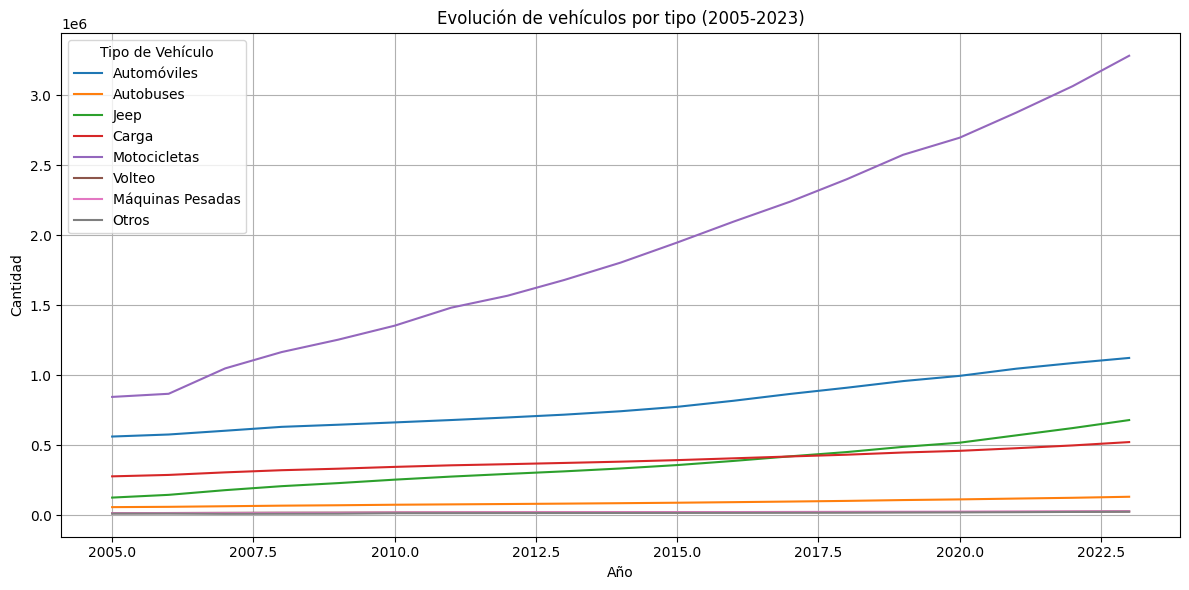

In [297]:
# Reformatear el DataFrame a formato largo
df_long = df_historico[:8].melt(id_vars='Tipo', 
                            var_name='Año', 
                            value_name='Cantidad')

# Asegurarte de que la columna 'Año' sea de tipo numérico
df_long['Año'] = pd.to_numeric(df_long['Año'])

# Crear el lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Año', y='Cantidad', hue='Tipo')
plt.title('Evolución de vehículos por tipo (2005-2023)')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de Vehículo')
plt.grid(True)
plt.tight_layout()
plt.show()


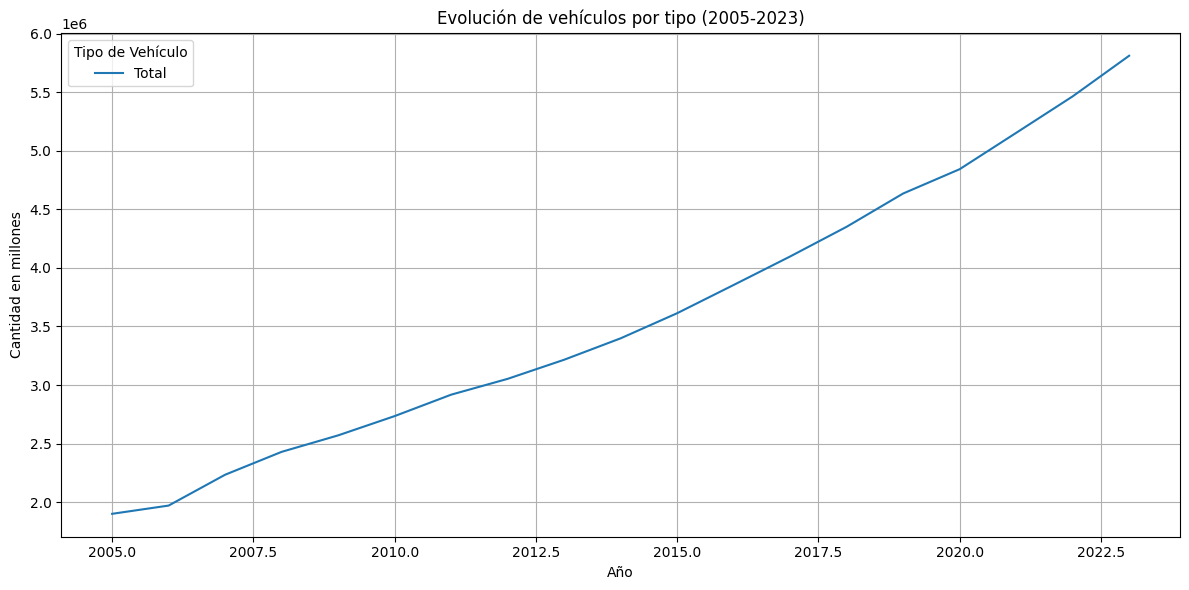

In [298]:
# Reformatear el DataFrame a formato largo
df_long = df_historico[-1:].melt(id_vars='Tipo', 
                            var_name='Año', 
                            value_name='Cantidad')

# Asegurarte de que la columna 'Año' sea de tipo numérico
df_long['Año'] = pd.to_numeric(df_long['Año'])

# Crear el lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Año', y='Cantidad', hue='Tipo')
plt.title('Evolución de vehículos por tipo (2005-2023)')
plt.xlabel('Año')
plt.ylabel('Cantidad en millones')
plt.legend(title='Tipo de Vehículo')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_historico['Aumento'] = df_historico[2023] - df_historico[2005]
df_historico['Aumento_%'] = (df_historico['Aumento'] / df_historico[2023]) * 100 

In [330]:
df_historico

,Tipo,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2016,2017,2018,2019,2020,2021,2022,2023,Aumento,Aumento_%
0,Automóviles,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,...,816470.0,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0,561456.0,50.025661
1,Autobuses,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,...,92144.0,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0,74100.0,56.698625
2,Jeep,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,...,386706.0,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0,553668.0,81.605377
3,Carga,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,...,405292.0,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0,244786.0,46.958820
4,Motocicletas,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,...,2096196.0,2238671.0,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0,2437077.0,74.278075
5,Volteo,13832.0,14535.0,15831.0,16816.0,17260.0,18272.0,18650.0,18941.0,19165.0,...,19974.0,20293.0,20746.0,21213.0,21690.0,22528.0,23920.0,25545.0,11713.0,45.852417
6,Máquinas Pesadas,13633.0,14293.0,14031.0,15140.0,15653.0,18226.0,18913.0,19429.0,19978.0,...,21411.0,22254.0,23013.0,23680.0,24204.0,25294.0,26394.0,27582.0,13949.0,50.572837
7,Otros,10393.0,10761.0,8837.0,9417.0,10042.0,13127.0,13576.0,14093.0,14496.0,...,15845.0,16446.0,17018.0,18358.0,19150.0,20352.0,22316.0,23968.0,13575.0,56.638017
8,Total,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,...,3854038.0,4097338.0,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0,3910324.0,67.293054


In [331]:
df_historico[['Tipo', 2023]]

,Tipo,2023
0,Automóviles,1122336.0
1,Autobuses,130691.0
2,Jeep,678470.0
3,Carga,521278.0
4,Motocicletas,3281018.0
5,Volteo,25545.0
6,Máquinas Pesadas,27582.0
7,Otros,23968.0
8,Total,5810888.0


## Registro del 2024

In [355]:
df_actual = pd.read_excel('C:\\Users\\DELL\\Downloads\\ParqueVehicular2024\\Parque Vehicular.xlsx', sheet_name='Stock vehiculos', skiprows=9)

In [356]:
df_actual.head()

,Tipo de Vehículo,Cantidad a diciembre 2023*,Año 2024,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre
1,Ambulancia,1630.0,1649,1657,1659,1664,1672,1683,1689,1689,1691,1705,1707
2,Autobús Privado,124611.0,125118,125778,126429,127113,127921,128468,129217,129769,130629,131633,132244
3,Autobús Público Interurbano,3646.0,3646,3646,3646,3646,3646,3646,3646,3646,3646,3646,3646
4,Autobús Público Urbano,1305.0,1305,1305,1305,1305,1305,1305,1305,1305,1305,1305,1305


In [357]:
df_actual = df_actual.iloc[1:18]

In [358]:
df_actual.reset_index(drop=True, inplace=True)

In [ ]:
df_actual[df_actual['Tipo_Vehiculo'] == 'Carga']

In [359]:
df_actual.shape

(17, 13)

In [360]:
df_actual.columns = [
    'Tipo_Vehiculo',
    "Diciembre_2023", 
    "Enero", 
    "Febrero", 
    "Marzo", 
    "Abril", 
    "Mayo", 
    "Junio", 
    "Julio", 
    "Agosto", 
    "Septiembre", 
    "Octubre", 
    'Noviembre'
]

In [361]:
df_actual

,Tipo_Vehiculo,Diciembre_2023,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre
0,Ambulancia,1630.0,1649,1657,1659,1664,1672,1683,1689,1689,1691,1705,1707
1,Autobús Privado,124611.0,125118,125778,126429,127113,127921,128468,129217,129769,130629,131633,132244
2,Autobús Público Interurbano,3646.0,3646,3646,3646,3646,3646,3646,3646,3646,3646,3646,3646
3,Autobús Público Urbano,1305.0,1305,1305,1305,1305,1305,1305,1305,1305,1305,1305,1305
4,Autobús Turístico,1129.0,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128
5,Automóvil Interurbano (Público),10540.0,10539,10539,10539,10539,10539,10539,10539,10539,10539,10539,10539
6,Automóvil Privado,1092385.0,1095685,1098819,1102125,1105354,1108669,1111637,1114493,1116692,1119329,1122886,1125693
7,Automóvil Público Urbano,17633.0,17625,17625,17625,17625,17625,17625,17625,17625,17625,17625,17625
8,Automóvil Turístico,1778.0,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775
9,Carga,521278.0,523345,525553,528386,530526,532948,534904,537259,538901,540776,543462,545902


In [362]:
df_actual_completo = df_actual.copy()

In [363]:
df_actual_completo = df_actual_completo.iloc[:,0:2]
df_actual_completo

,Tipo_Vehiculo,Diciembre_2023
0,Ambulancia,1630.0
1,Autobús Privado,124611.0
2,Autobús Público Interurbano,3646.0
3,Autobús Público Urbano,1305.0
4,Autobús Turístico,1129.0
5,Automóvil Interurbano (Público),10540.0
6,Automóvil Privado,1092385.0
7,Automóvil Público Urbano,17633.0
8,Automóvil Turístico,1778.0
9,Carga,521278.0


In [364]:
df_actual_completo['Noviembre_2024'] = df_actual['Noviembre']
df_actual_completo

,Tipo_Vehiculo,Diciembre_2023,Noviembre_2024
0,Ambulancia,1630.0,1707
1,Autobús Privado,124611.0,132244
2,Autobús Público Interurbano,3646.0,3646
3,Autobús Público Urbano,1305.0,1305
4,Autobús Turístico,1129.0,1128
5,Automóvil Interurbano (Público),10540.0,10539
6,Automóvil Privado,1092385.0,1125693
7,Automóvil Público Urbano,17633.0,17625
8,Automóvil Turístico,1778.0,1775
9,Carga,521278.0,545902


In [365]:
df_actual

,Tipo_Vehiculo,Diciembre_2023,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre
0,Ambulancia,1630.0,1649,1657,1659,1664,1672,1683,1689,1689,1691,1705,1707
1,Autobús Privado,124611.0,125118,125778,126429,127113,127921,128468,129217,129769,130629,131633,132244
2,Autobús Público Interurbano,3646.0,3646,3646,3646,3646,3646,3646,3646,3646,3646,3646,3646
3,Autobús Público Urbano,1305.0,1305,1305,1305,1305,1305,1305,1305,1305,1305,1305,1305
4,Autobús Turístico,1129.0,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128
5,Automóvil Interurbano (Público),10540.0,10539,10539,10539,10539,10539,10539,10539,10539,10539,10539,10539
6,Automóvil Privado,1092385.0,1095685,1098819,1102125,1105354,1108669,1111637,1114493,1116692,1119329,1122886,1125693
7,Automóvil Público Urbano,17633.0,17625,17625,17625,17625,17625,17625,17625,17625,17625,17625,17625
8,Automóvil Turístico,1778.0,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775
9,Carga,521278.0,523345,525553,528386,530526,532948,534904,537259,538901,540776,543462,545902


In [366]:
df_actual[['Tipo_Vehiculo', 'Noviembre']]

,Tipo_Vehiculo,Noviembre
0,Ambulancia,1707
1,Autobús Privado,132244
2,Autobús Público Interurbano,3646
3,Autobús Público Urbano,1305
4,Autobús Turístico,1128
5,Automóvil Interurbano (Público),10539
6,Automóvil Privado,1125693
7,Automóvil Público Urbano,17625
8,Automóvil Turístico,1775
9,Carga,545902


In [367]:
df_actual.iloc[:,1:].sum(axis=1)

0        20095.0
1      1538930.0
2        43752.0
3        15660.0
4        13537.0
5       126469.0
6     13313767.0
7       211508.0
8        21303.0
9      6403240.0
10        3884.0
11     8464438.0
12      338066.0
13       15646.0
14    40699886.0
15      256654.0
16      314485.0
dtype: object

In [368]:
df_historico

,Tipo,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2017,2018,2019,2020,2021,2022,2023,Aumento,Aumento_%,2024
0,Automóviles,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,...,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0,561456.0,50.025661,None
1,Autobuses,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,...,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0,74100.0,56.698625,None
2,Jeep,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,...,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0,553668.0,81.605377,None
3,Carga,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,...,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0,244786.0,46.958820,None
4,Motocicletas,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,...,2238671.0,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0,2437077.0,74.278075,None
5,Volteo,13832.0,14535.0,15831.0,16816.0,17260.0,18272.0,18650.0,18941.0,19165.0,...,20293.0,20746.0,21213.0,21690.0,22528.0,23920.0,25545.0,11713.0,45.852417,None
6,Máquinas Pesadas,13633.0,14293.0,14031.0,15140.0,15653.0,18226.0,18913.0,19429.0,19978.0,...,22254.0,23013.0,23680.0,24204.0,25294.0,26394.0,27582.0,13949.0,50.572837,None
7,Otros,10393.0,10761.0,8837.0,9417.0,10042.0,13127.0,13576.0,14093.0,14496.0,...,16446.0,17018.0,18358.0,19150.0,20352.0,22316.0,23968.0,13575.0,56.638017,None
8,Total,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,...,4097338.0,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0,3910324.0,67.293054,None


In [369]:
df_historico[2024] = None

In [370]:
df_historico

,Tipo,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2017,2018,2019,2020,2021,2022,2023,Aumento,Aumento_%,2024
0,Automóviles,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,...,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0,561456.0,50.025661,None
1,Autobuses,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,...,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0,74100.0,56.698625,None
2,Jeep,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,...,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0,553668.0,81.605377,None
3,Carga,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,...,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0,244786.0,46.958820,None
4,Motocicletas,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,...,2238671.0,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0,2437077.0,74.278075,None
5,Volteo,13832.0,14535.0,15831.0,16816.0,17260.0,18272.0,18650.0,18941.0,19165.0,...,20293.0,20746.0,21213.0,21690.0,22528.0,23920.0,25545.0,11713.0,45.852417,None
6,Máquinas Pesadas,13633.0,14293.0,14031.0,15140.0,15653.0,18226.0,18913.0,19429.0,19978.0,...,22254.0,23013.0,23680.0,24204.0,25294.0,26394.0,27582.0,13949.0,50.572837,None
7,Otros,10393.0,10761.0,8837.0,9417.0,10042.0,13127.0,13576.0,14093.0,14496.0,...,16446.0,17018.0,18358.0,19150.0,20352.0,22316.0,23968.0,13575.0,56.638017,None
8,Total,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,...,4097338.0,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0,3910324.0,67.293054,None


In [371]:
# Filtrar las filas donde Tipo_Vehiculo contiene "Automóvil"
filtro_automovil = df_actual['Tipo_Vehiculo'].str.contains('Automóvil', case=False, na=False)

# Calcular la suma de la columna Noviembre para esas filas
suma_automovil = df_actual.loc[filtro_automovil, 'Noviembre'].sum()

In [374]:
suma_automovil

1155632

In [378]:
df_historico.loc[df_historico['Tipo'] == 'Automóviles', '2024'] = suma_automovil

In [379]:
df_historico

,Tipo,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2018,2019,2020,2021,2022,2023,Aumento,Aumento_%,2024,2024
0,Automóviles,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,...,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0,561456.0,50.025661,None,1155632.0
1,Autobuses,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,...,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0,74100.0,56.698625,None,NaN
2,Jeep,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,...,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0,553668.0,81.605377,None,NaN
3,Carga,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,...,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0,244786.0,46.958820,None,NaN
4,Motocicletas,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,...,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0,2437077.0,74.278075,None,NaN
5,Volteo,13832.0,14535.0,15831.0,16816.0,17260.0,18272.0,18650.0,18941.0,19165.0,...,20746.0,21213.0,21690.0,22528.0,23920.0,25545.0,11713.0,45.852417,None,NaN
6,Máquinas Pesadas,13633.0,14293.0,14031.0,15140.0,15653.0,18226.0,18913.0,19429.0,19978.0,...,23013.0,23680.0,24204.0,25294.0,26394.0,27582.0,13949.0,50.572837,None,NaN
7,Otros,10393.0,10761.0,8837.0,9417.0,10042.0,13127.0,13576.0,14093.0,14496.0,...,17018.0,18358.0,19150.0,20352.0,22316.0,23968.0,13575.0,56.638017,None,NaN
8,Total,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,...,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0,3910324.0,67.293054,None,NaN


In [380]:
filtro_autobus = df_actual['Tipo_Vehiculo'].str.contains('Autobús', case=False, na=False)
suma_autobus = df_actual.loc[filtro_autobus, 'Noviembre'].sum()
df_historico.loc[df_historico['Tipo'] == 'Autobuses', '2024'] = suma_autobus
df_historico

,Tipo,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2018,2019,2020,2021,2022,2023,Aumento,Aumento_%,2024,2024
0,Automóviles,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,...,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0,561456.0,50.025661,None,1155632.0
1,Autobuses,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,...,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0,74100.0,56.698625,None,138323.0
2,Jeep,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,...,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0,553668.0,81.605377,None,NaN
3,Carga,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,...,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0,244786.0,46.958820,None,NaN
4,Motocicletas,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,...,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0,2437077.0,74.278075,None,NaN
5,Volteo,13832.0,14535.0,15831.0,16816.0,17260.0,18272.0,18650.0,18941.0,19165.0,...,20746.0,21213.0,21690.0,22528.0,23920.0,25545.0,11713.0,45.852417,None,NaN
6,Máquinas Pesadas,13633.0,14293.0,14031.0,15140.0,15653.0,18226.0,18913.0,19429.0,19978.0,...,23013.0,23680.0,24204.0,25294.0,26394.0,27582.0,13949.0,50.572837,None,NaN
7,Otros,10393.0,10761.0,8837.0,9417.0,10042.0,13127.0,13576.0,14093.0,14496.0,...,17018.0,18358.0,19150.0,20352.0,22316.0,23968.0,13575.0,56.638017,None,NaN
8,Total,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,...,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0,3910324.0,67.293054,None,NaN


In [394]:
df_historico.loc[df_historico['Tipo'] == 'Jeep', '2024'] = df_actual.loc[df_actual['Tipo_Vehiculo'] == 'Jeep', 'Noviembre'].values[0]

In [404]:
df_historico.loc[df_historico['Tipo'] == 'Carga', '2024'] = df_actual.loc[df_actual['Tipo_Vehiculo'] == 'Carga', 'Noviembre'].values[0]

In [407]:
df_historico.loc[df_historico['Tipo'] == 'Motocicletas', '2024'] = df_actual.loc[df_actual['Tipo_Vehiculo'] == 'Motocicleta', 'Noviembre'].values[0]
df_historico.loc[df_historico['Tipo'] == 'Volteo', '2024'] = df_actual.loc[df_actual['Tipo_Vehiculo'] == 'Volteo', 'Noviembre'].values[0]
df_historico.loc[df_historico['Tipo'] == 'Máquinas Pesadas', '2024'] = df_actual.loc[df_actual['Tipo_Vehiculo'] == 'Maquina Pesada', 'Noviembre'].values[0]

In [409]:
df_historico.loc[df_historico['Tipo'] == 'Otros', '2024'] = (df_actual.loc[df_actual['Tipo_Vehiculo'] == 'Ambulancia', 'Noviembre'].values[0] + 
                                                             df_actual.loc[df_actual['Tipo_Vehiculo'] == 'Fúnebre', 'Noviembre'].values[0] + 
                                                             df_actual.loc[df_actual['Tipo_Vehiculo'] == 'Montacarga', 'Noviembre'].values[0] + 
                                                             df_actual.loc[df_actual['Tipo_Vehiculo'] == 'Remolque', 'Noviembre'].values[0])

In [416]:
df_historico.iloc[:]

,Tipo,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2018,2019,2020,2021,2022,2023,Aumento,Aumento_%,2024,2024
0,Automóviles,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,...,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0,561456.0,50.025661,None,1155632.0
1,Autobuses,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,...,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0,74100.0,56.698625,None,138323.0
2,Jeep,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,...,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0,553668.0,81.605377,None,731357.0
3,Carga,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,...,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0,244786.0,46.958820,None,545902.0
4,Motocicletas,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,...,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0,2437077.0,74.278075,None,3509088.0
5,Volteo,13832.0,14535.0,15831.0,16816.0,17260.0,18272.0,18650.0,18941.0,19165.0,...,20746.0,21213.0,21690.0,22528.0,23920.0,25545.0,11713.0,45.852417,None,26897.0
6,Máquinas Pesadas,13633.0,14293.0,14031.0,15140.0,15653.0,18226.0,18913.0,19429.0,19978.0,...,23013.0,23680.0,24204.0,25294.0,26394.0,27582.0,13949.0,50.572837,None,28486.0
7,Otros,10393.0,10761.0,8837.0,9417.0,10042.0,13127.0,13576.0,14093.0,14496.0,...,17018.0,18358.0,19150.0,20352.0,22316.0,23968.0,13575.0,56.638017,None,25303.0
8,Total,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,...,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0,3910324.0,67.293054,None,NaN


In [423]:
df_historico.drop(columns=2024, inplace=True)

In [424]:
df_historico.columns

Index([     'Tipo',        2005,        2006,        2007,        2008,
              2009,        2010,        2011,        2012,        2013,
              2014,        2015,        2016,        2017,        2018,
              2019,        2020,        2021,        2022,        2023,
         'Aumento', 'Aumento_%',      '2024'],
      dtype='object')

In [426]:
df_historico

,Tipo,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2017,2018,2019,2020,2021,2022,2023,Aumento,Aumento_%,2024
0,Automóviles,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,...,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0,561456.0,50.025661,1155632.0
1,Autobuses,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,...,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0,74100.0,56.698625,138323.0
2,Jeep,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,...,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0,553668.0,81.605377,731357.0
3,Carga,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,...,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0,244786.0,46.958820,545902.0
4,Motocicletas,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,...,2238671.0,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0,2437077.0,74.278075,3509088.0
5,Volteo,13832.0,14535.0,15831.0,16816.0,17260.0,18272.0,18650.0,18941.0,19165.0,...,20293.0,20746.0,21213.0,21690.0,22528.0,23920.0,25545.0,11713.0,45.852417,26897.0
6,Máquinas Pesadas,13633.0,14293.0,14031.0,15140.0,15653.0,18226.0,18913.0,19429.0,19978.0,...,22254.0,23013.0,23680.0,24204.0,25294.0,26394.0,27582.0,13949.0,50.572837,28486.0
7,Otros,10393.0,10761.0,8837.0,9417.0,10042.0,13127.0,13576.0,14093.0,14496.0,...,16446.0,17018.0,18358.0,19150.0,20352.0,22316.0,23968.0,13575.0,56.638017,25303.0
8,Total,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,...,4097338.0,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0,3910324.0,67.293054,NaN
